In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplohttp://localhost:8888/notebooks/Module%204/Untitled.ipynb#tlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [11]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[0][1]*mi - intercept)/coef[0][0]), mi],[((-coef[0][1]*ma - intercept)/coef[0][0]), ma]])
    #points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1] ,label='Decision Boundary')

What if Data is imabalanced
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ration between positive and negative is 100 : 2, in the 2nd data its 100:20, in the 3rd data its 100:40 and in 4th one its 100:80

## Task 1: Applying SVM

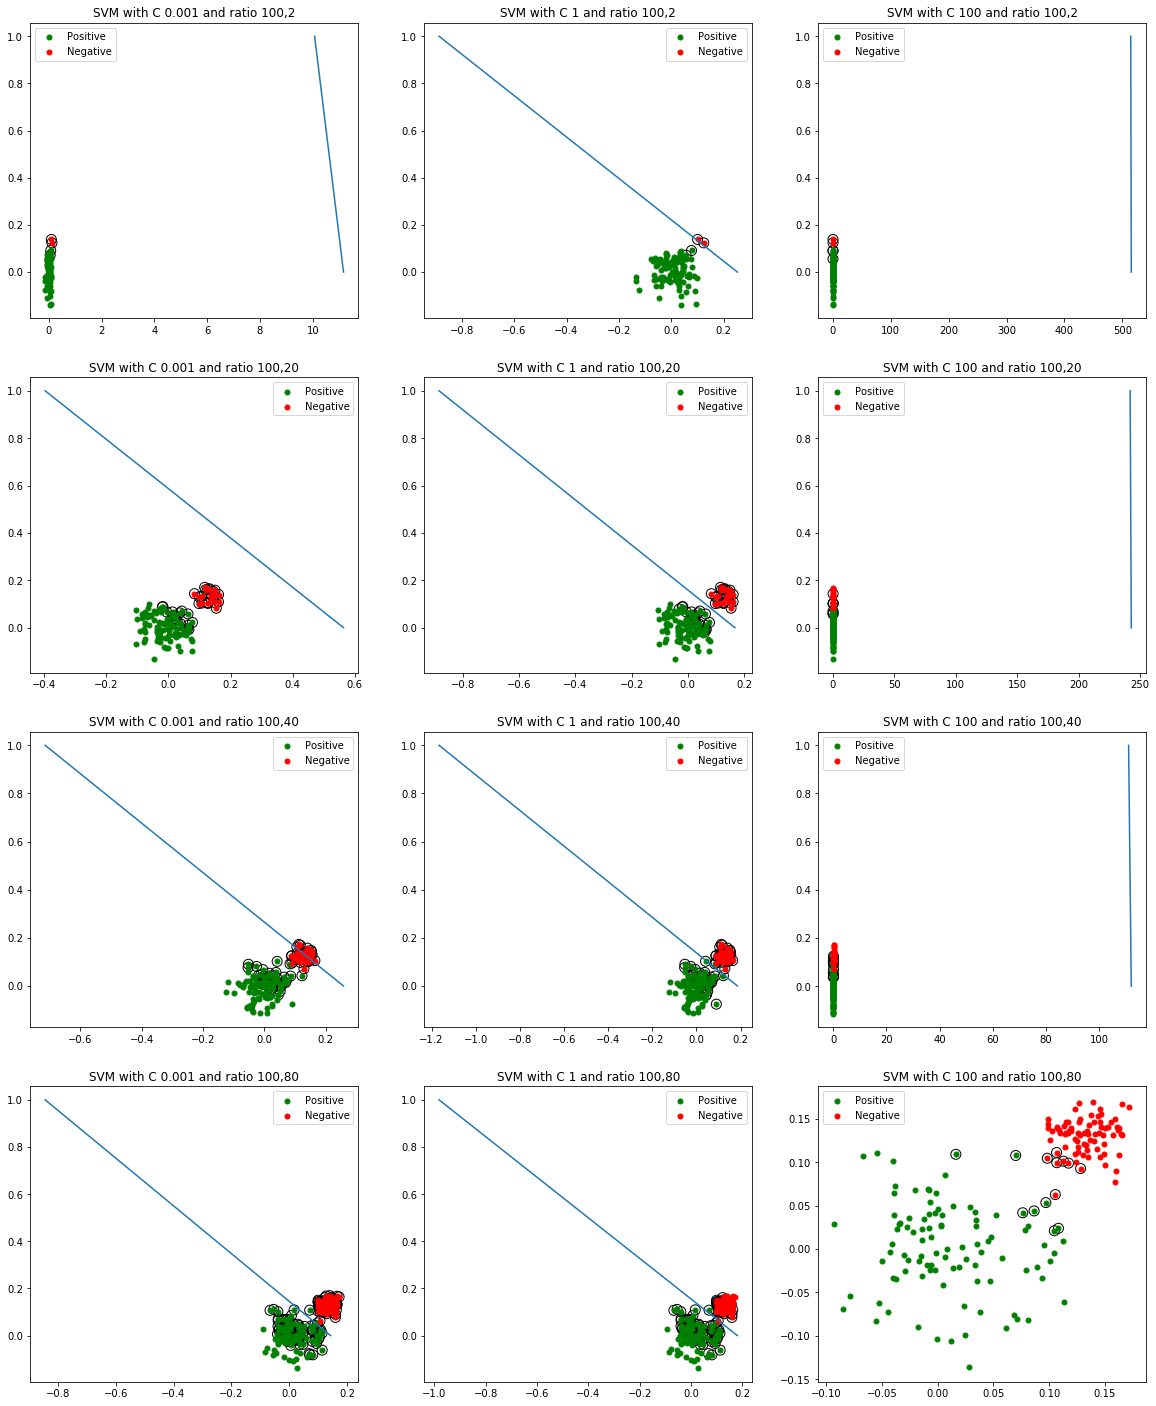

In [15]:
#defining ratios for
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

#defining figure size
sub_c = 0
plt.figure(figsize=(20,25))

#defining learning rate
lr=[0.001, 1, 100]

#for each value of ratio
for j,i in enumerate(ratios):
    
    #randomly creating x and y
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    
    #getting minimum x ,y
    y_mn=np.min(y)
    y_mx=np.max(y)
    
    # apply SVM for each learning rate 
    for k in lr:
        sub_c+=1

        clf = SVC(C= k, kernel='linear')
        clf.fit(X, y) 
        
        #getting weight and intercept
        w=clf.coef_
        b=clf.intercept_
        
        #defining positive and negative support vectore
        p_sp_vectors = clf.support_vectors_[:, 0]        
        n_sp_vectors = clf.support_vectors_[:, 1]
        
        #drawing the hyperplane
        draw_line(w,b,y_mn,y_mx)
        
        #creating subplot
        plt.subplot(len(ratios),len(lr),sub_c)
        
        #Creating scatter for positive and negative points for support vectors
        plt.scatter(p_sp_vectors, n_sp_vectors, s=100, linewidth=1, facecolors='none', edgecolors='k')

        #scattering positive and negative points
        plt.scatter(X_p[:,0],X_p[:,1], s=25 , label='Positive',  color='green')
        plt.scatter(X_n[:,0],X_n[:,1], s=25 , label='Negative', color='red')
        
        plt.legend()
        
        #defining title
        plt.title('SVM with C ' +str(k) +' and ratio ' +str(i[0]) +',' +str(i[1]))
        
plt.show()

## Task 2: Applying LR

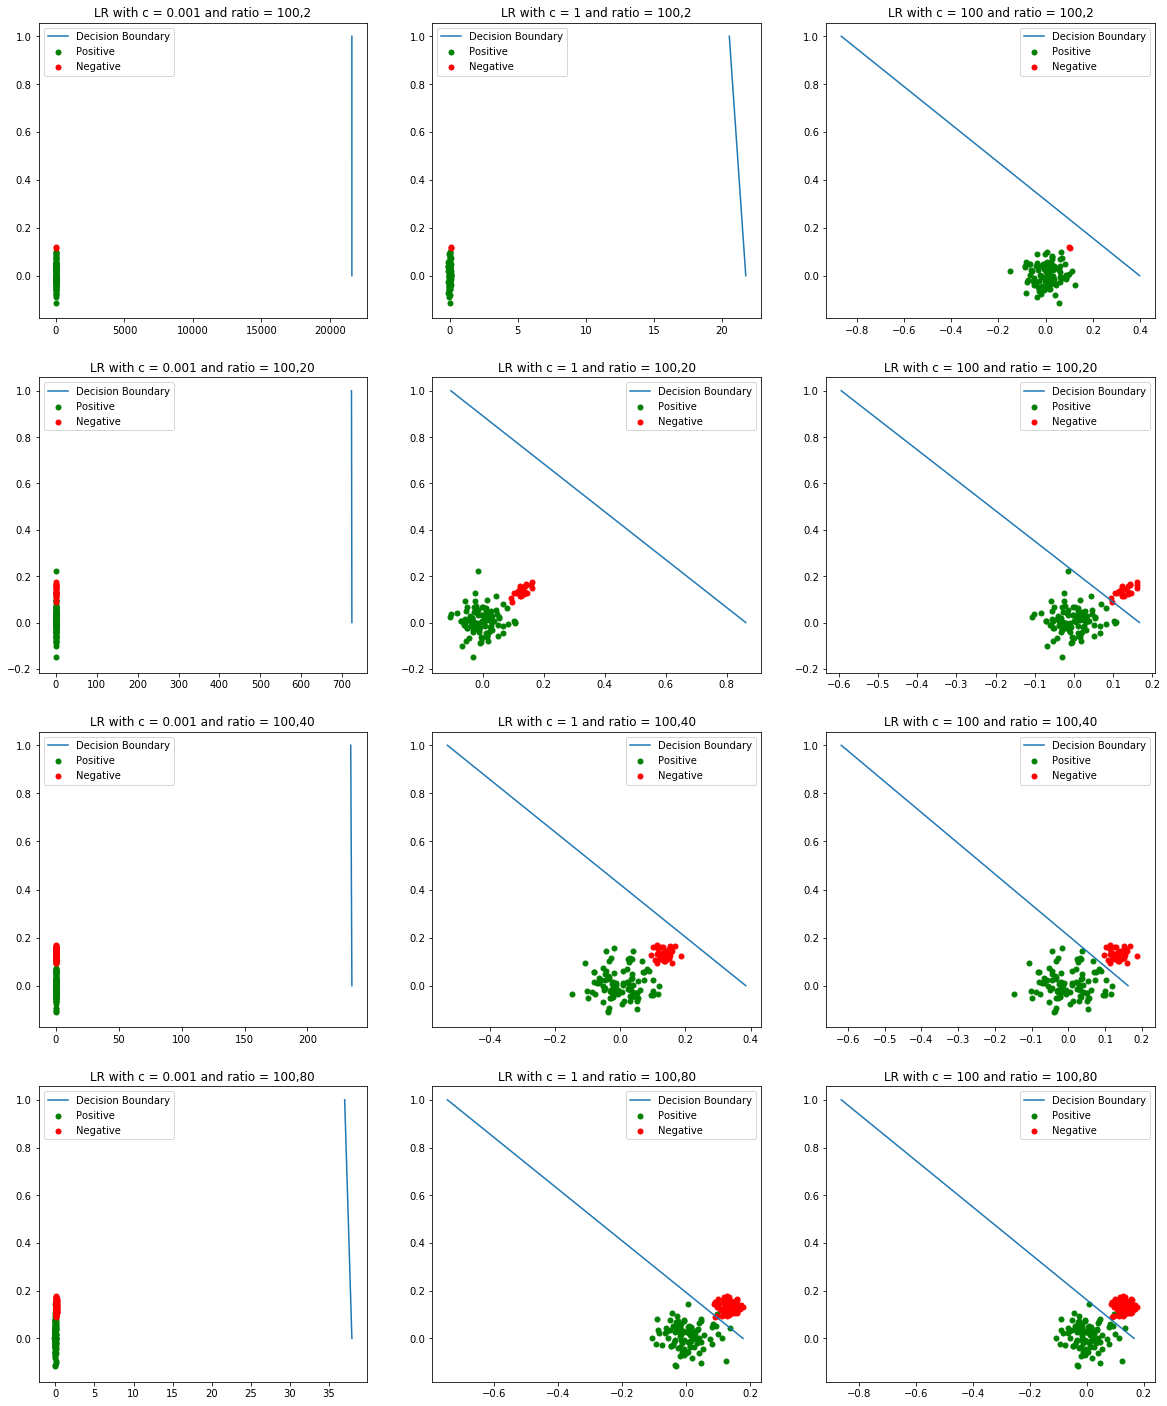

In [16]:
# here we are creating 2d imbalanced data points
from sklearn.linear_model import LogisticRegression

#defining ratios 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

sub_c = 0

#defining figure size
plt.figure(figsize=(20,25))

#defining learning rate
lr=[0.001, 1, 100]

#for each value of ratio
for j,i in enumerate(ratios):
    
    #randomly creating x and y
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    
   
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    
    #getting minimum and maximum value of y
    y_mn=np.min(y)
    y_mx=np.max(y)
    
    # apply LogisticRegression for each learning rate 
    for k in lr:
        sub_c+=1
        clf = LogisticRegression(C=k)
        clf.fit(X, y) 
        
        #getting weight and intercept
        w=clf.coef_
        b=clf.intercept_
        
        #creating subplot
        plt.subplot(len(ratios),len(lr),sub_c)
        
        #drawing the hyperplane
        draw_line(w,b,y_mn,y_mx)
        
        #scattering positive and negative points
        plt.scatter(X_p[:,0],X_p[:,1], s=25 , label='Positive',  color='green')
        plt.scatter(X_n[:,0],X_n[:,1], s=25 , label='Negative', color='red')
        
        plt.legend()

        plt.title('LR with c = ' +str(k) +' and ratio = ' +str(i[0]) +',' +str(i[1]))
plt.show()

Observation:
    1.As we analysed that low value of C (inverse of learning rate) we are overfitting.
    2.With high value of C we are getting separarting hyperplane.
    3.Its impossible to seprate highly imbalance data with low value of c.

## 8_B_Task

In [18]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [19]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [20]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [21]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [22]:
X=data[['f1','f2','f3']].values
Y=data['y'].values

feature_names = np.array(data.drop(['y'], axis = 1).columns.values)
print(X.shape)
print(Y.shape)
print(feature_names)

(200, 3)
(200,)
['f1' 'f2' 'f3']


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

## Task 1

In [23]:
#creating feature importance
def printfeatureimportance(coef, feature_names):
    
    #defining absolute value of features
    coef=abs(coef)
    
    x = dict(zip(feature_names, coef))
    
    print('\n'.join(f'{key}: {value}' for key, value in x.items()))

    sorted_dictionary={k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
    
    print('<'.join(f'{key}' for key, value in sorted_dictionary.items()))
    


In [24]:
#Applying logistic Regression model
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='log',penalty='l1')
clf.fit(X,Y)

printfeatureimportance(clf.coef_[0],feature_names)

f1: 11423.936684705735
f2: 7784.810334252932
f3: 23361.746139494946
f2<f1<f3


Observation:
    1. Absolute weights are proportional to feature importance. 
    2. After applying logistic regression we get feature importance - f2<f1<f3

In [25]:
from sklearn import linear_model

#applying SVM
clf = linear_model.SGDClassifier(loss='hinge',penalty='l2')
clf.fit(X,Y)

printfeatureimportance(clf.coef_[0],feature_names)

f1: 6431.242378546148
f2: 3683.7687784226964
f3: 11222.120874932225
f2<f1<f3


Observation:
    1. After applying SVM we get feature importance - f2<f1<f3

In [26]:
X=data[['f1','f2','f3']].values

x_mean =X.mean()
x_std=X.std()

X=(X-x_mean)/x_std

In [27]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='log',penalty='l2')
clf.fit(X,Y)

printfeatureimportance(clf.coef_[0],feature_names)

f1: 2.243422653693715
f2: 3.0391765633647383
f3: 1.8122740860954065
f3<f1<f2


In [28]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='hinge',penalty='l2')
clf.fit(X,Y)

printfeatureimportance(clf.coef_[0],feature_names)

f1: 6.097081126979776
f2: 0.20795185646188769
f3: 1.8802485200712729
f2<f3<f1


Observation:
    1. When we standerdise the data feature importance has been changed
    2. Feature importance might be changed if we standerdise our data

## 8 C Task

## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [30]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [31]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

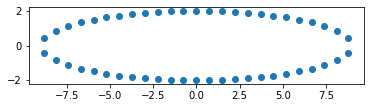

In [32]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

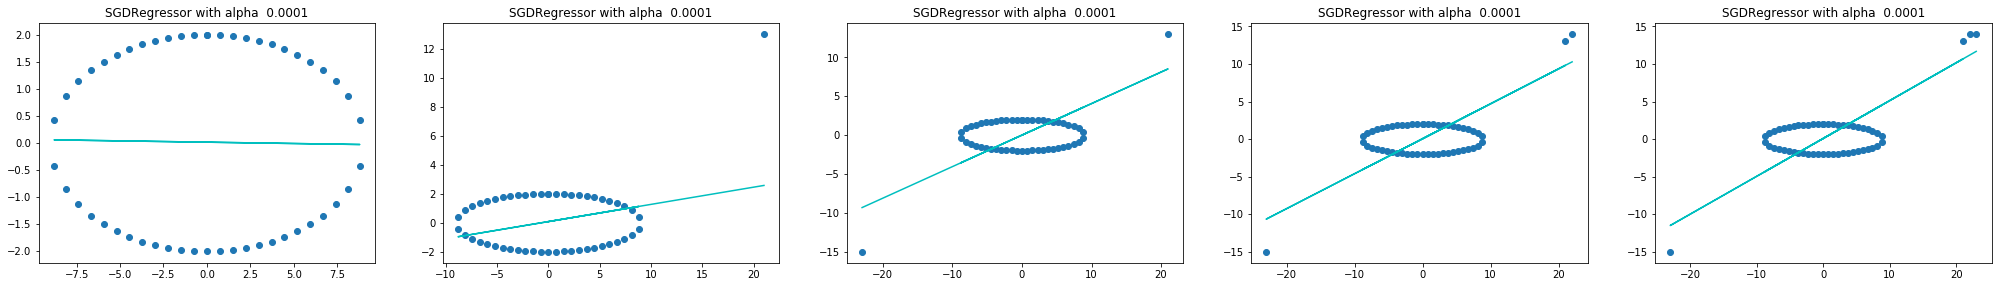

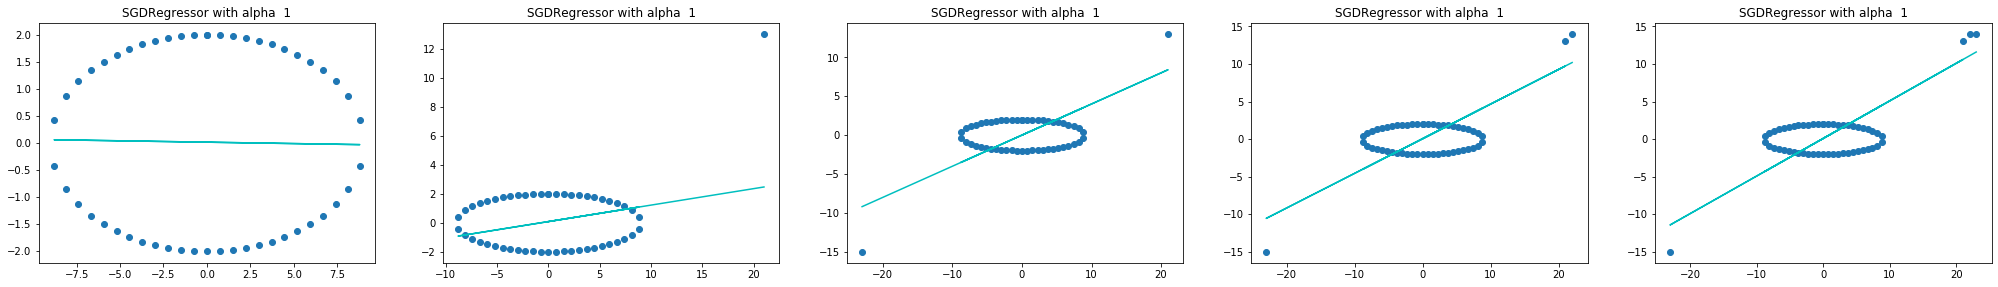

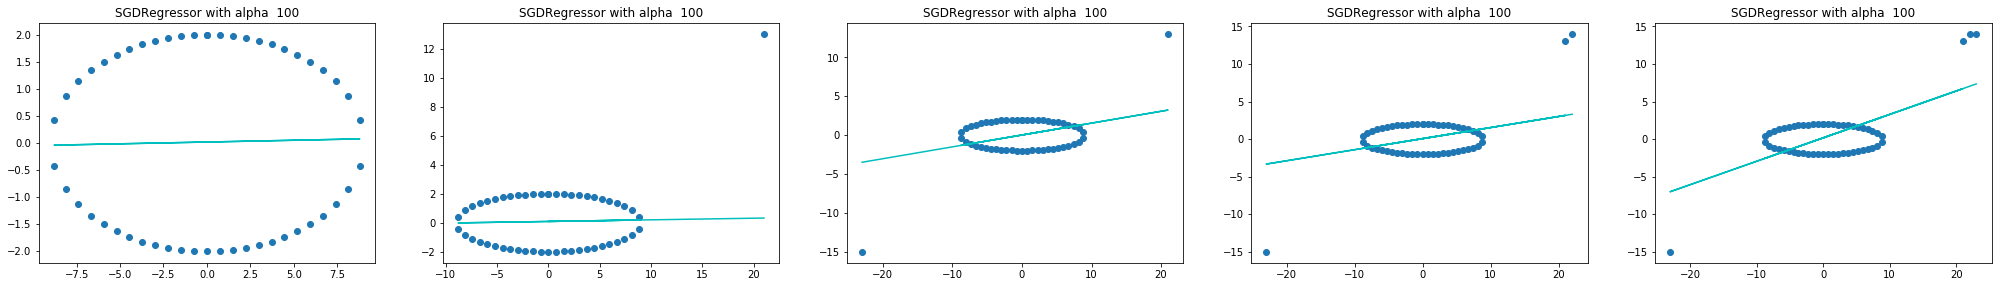

In [33]:
import matplotlib as mp

alpha=[0.0001, 1, 100] 
outliers= [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]

for i in alpha:
    X= b * np.sin(phi)
    Y= a * np.cos(phi)
    fig=plt.figure(figsize=(35,15))
    cnt=1
    for j in outliers:
        value = "ax" + "_" + str(cnt)
        X=np.append(X,j[0])
        Y=np.append(Y,j[1])
        
        X=X.reshape(-1,1)
        clf=SGDRegressor(alpha=i, eta0=0.001, learning_rate='constant',random_state=0)
        clf.fit(X,Y)
        
        slope=clf.coef_[0]
        intercept=clf.intercept_[0]
        
        abline_values = [slope * i + intercept for i in X]
        
        value=fig.add_subplot(3,5,cnt)
# Plot the best fit line over the actual values
        value.scatter(X,Y)
        value.plot(X,abline_values, 'c')
        cnt+=1
        
        plt.title('SGDRegressor with alpha  ' + str(i))
    plt.show()

Observation:
    1.As we increased alpha for SGDRegressor the plane is less affected by outliers.
    2.As we increased number of outliers our regressor line is much affected and tend to shift towards outliers.

## Task-D: Collinear features and their effect on linear models

In [34]:
data = pd.read_csv('task_d.csv')

In [35]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


#### Task: 1 Logistic Regression
<pre>

1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap

In [36]:
X = data.drop(['target'], axis=1)
Y = data['target']

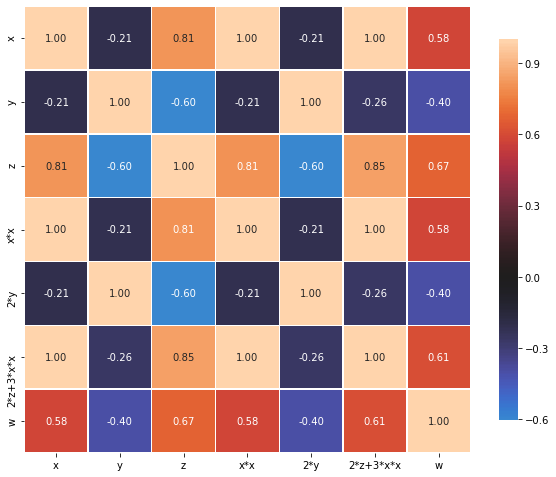

In [37]:
import seaborn as sns
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(X)

2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'

In [38]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
feature_names = np.array(data.drop(['y'], axis = 1).columns.values)

In [8]:
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)


sgd = linear_model.SGDClassifier(loss='log')

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_distributions = dict(
                           alpha=C)

random = RandomizedSearchCV(estimator=sgd,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1,
                            n_iter=1000)
random_result = random.fit(X_train, y_train)

print('Best Params: ', random_result.best_params_)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=1000. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params:  {'alpha': 0.0001}


3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

best_model = linear_model.SGDClassifier(alpha=0.0001, penalty='l1', loss='log', random_state=42)
best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)
best_model_accuracy_1=accuracy_score(y_test,predictions)
best_model_weight_1=best_model.coef_[0]

print("Accuracy of best model is " ,best_model_accuracy_1)
print("Weight for best model is" ,best_model_weight_1)

Accuracy of best model is  1.0
Weight for best model is [ 6.24419161 -6.22349769 17.41767178  5.51064453 -6.22349769  7.07173153
  2.98537057]


4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_

In [10]:
df = data.drop(['target'], axis=1)


numeric_cols = [col for col in df if df[col].dtype.kind != 'O']
   
df[numeric_cols] += 0.02


In [11]:
df=df.values
Y = data['target'].values

from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, stratify=Y)


sgd = linear_model.SGDClassifier(loss='log')

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_distributions = dict(
                           alpha=C)

random = RandomizedSearchCV(estimator=sgd,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1,
                            n_iter=1000)
random_result = random.fit(X_train, y_train)

print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params:  {'alpha': 0.0001}


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=1000. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

best_model = linear_model.SGDClassifier(alpha=0.0001, penalty='l1', loss='log', random_state=42)
best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)
best_model_accuracy_2=accuracy_score(y_test,predictions)
best_model_weight_2=best_model.coef_[0]

print("Accuracy of Edited model is " ,best_model_accuracy_2)
print("Weight for Edited model is" ,best_model_weight_2)

Accuracy of Edited model is  1.0
Weight for Edited model is [ 18.50273384 -10.7708193   16.17928323  20.1765889  -10.7708193
  20.11548974  14.27808978]


5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights compare to the other feature

In [22]:
import heapq
from heapq import nlargest

def check_deviation(best_model_acc,best_model_weigth,edited_model_acc, edited_model_weigth,feature_names):
    
    print ("difference between 'best_model_accuracy_edited' and 'best_model_accuracy' is", best_model_acc-edited_model_acc)
    
    lst=abs(best_model_weigth - edited_model_weigth)
    
    x = dict(zip(feature_names, lst))
    
    #print('\n'.join(f'{key}: {value}' for key, value in x.items()))
    
    fourHighest = nlargest(4, x, key = x.get) 
    
    print("Top 4 features which have higher % change in weights compare to the other feature are", fourHighest)

In [23]:
check_deviation(best_model_accuracy_1,best_model_weight_1,best_model_accuracy_2,best_model_weight_2,feature_names)

difference between 'best_model_accuracy_edited' and 'best_model_accuracy' is 0.0
Top 4 features which have higher % change in weights compare to the other feature are ['2*y', 'w', 'x', 'target']


In [24]:
data = pd.read_csv('task_d.csv')

In [25]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
feature_names = np.array(data.drop(['y'], axis = 1).columns.values)

In [27]:
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)


sgd = linear_model.SGDClassifier(loss='hinge')

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_distributions = dict(
                           alpha=C)

random = RandomizedSearchCV(estimator=sgd,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1,
                            n_iter=1000)
random_result = random.fit(X_train, y_train)

print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params:  {'alpha': 0.001}


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=1000. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

best_model = linear_model.SGDClassifier(alpha=0.001, penalty='l2', loss='hinge', random_state=42)
best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)
best_model_accuracy_1=accuracy_score(y_test,predictions)
best_model_weight_1=best_model.coef_[0]

print("Accuracy of best model is " ,best_model_accuracy_1)
print("Weight for best model is" ,best_model_weight_1)

Accuracy of best model is  1.0
Weight for best model is [ 1.27537132 -1.70949909  4.70493431  1.12848843 -1.70949909  1.58368696
  2.68169358]


In [33]:
df = data.drop(['target'], axis=1)


numeric_cols = [col for col in df if df[col].dtype.kind != 'O']
   
df[numeric_cols] += 0.02


In [34]:
df=df.values
Y = data['target'].values

from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, stratify=Y)


sgd = linear_model.SGDClassifier(loss='hinge')

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_distributions = dict(
                           alpha=C)

random = RandomizedSearchCV(estimator=sgd,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1,
                            n_iter=1000)
random_result = random.fit(X_train, y_train)

print('Best Params: ', random_result.best_params_)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=1000. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params:  {'alpha': 0.0001}


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

best_model = linear_model.SGDClassifier(alpha=0.0001, penalty='l2', loss='hinge', random_state=42)
best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)
best_model_accuracy_2=accuracy_score(y_test,predictions)
best_model_weight_2=best_model.coef_[0]

print("Accuracy of Edited model is " ,best_model_accuracy_2)
print("Weight for Edited model is" ,best_model_weight_2)

Accuracy of Edited model is  1.0
Weight for Edited model is [ 4.01851283 -8.07958109  9.33948278  3.86593518 -8.07958109  4.60695347
  0.62333602]


In [36]:
check_deviation(best_model_accuracy_1,best_model_weight_1,best_model_accuracy_2,best_model_weight_2,feature_names)

difference between 'best_model_accuracy_edited' and 'best_model_accuracy' is 0.0
Top 4 features which have higher % change in weights compare to the other feature are ['z', '2*z+3*x*x', 'x*x', 'w']


### 8_E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [4]:
clf = SVC(gamma=0.001, C=100.)
clf.fit(x_train, y_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
y_alpha=clf.dual_coef_[0]
sv=clf.support_vectors_
intercept=clf.intercept_
gamma=0.001

In [6]:
def decision_function(x_cv,y_alpha,sv,intercept,gamma):
    
    fuc=[]
    value=[]
    for i in x_cv:
        s=0
        for j in range(len(sv)):
            y_a=y_alpha[j]
            s+=y_a*(np.exp(-gamma*(np.linalg.norm(sv[j]-i)**2)))
        s= s+intercept
        
        value.append(s[0])
        if s>0:
            fuc.append(1)
        else:
            fuc.append(-1)
    return fuc,value
       

In [7]:
f_cv,value=decision_function(x_cv,y_alpha,sv,intercept,gamma)

In [8]:
print(value[:5])

[-2.063693160294442, -3.433970695784972, -2.8236855358051334, 1.6394826855150124, -3.821976607728225]


In [9]:
positive_val=sum(k>0 for k in f_cv)
negative_val=sum(k<=0 for k in f_cv)

print(positive_val)
print(negative_val)

287
713


In [10]:
f_cv_1=clf.decision_function(x_cv)

In [11]:
positive_val=sum(k>0 for k in f_cv_1)
negative_val=sum(k<=0 for k in f_cv_1)

print(positive_val)
print(negative_val)

287
713


In [12]:
print(f_cv_1[:5])

[-2.06369316 -3.4339707  -2.82368554  1.63948269 -3.82197661]



> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [13]:
y_p=positive_val+1/positive_val+2
y_n=1/negative_val+2

print(y_p,y_n)

289.0034843205575 2.0014025245441793


In [34]:
#defining log loss
def log_loss(w, b, X, Y):
    
    sum_loss = 0
    for i in range(len(X)):

        y = 0
        if Y[i] == 1:
            y = y_p
        else:
            y = y_n

        sum_loss += y * np.log10(sigmoid(X[i], w, b)) + (1 - y) * np.log10(1 - sigmoid(X[i], w, b))
        
    return -1 * sum_loss/len(X)

In [36]:
#defining sigmoid function
def sigmoid(x, w, b):
        
    z = np.dot(x, w.T) + b
    sig = 1 / (1 + np.exp(-z))
    return sig

In [37]:
def logistic_regression_fit(X, Y, eta0, alpha, num_iteration):
               
        lst_train = []
        a=[]
        h=[]
        
        #Initial w and b
        w = np.zeros_like(X[0])
        b = 0

        for epoch in range(1, num_iteration):                                
                                        
            
            error = log_loss(w, b, X, Y)

            #Updating weights and intercept
            w = (1 - (alpha * eta0)/len(X)) * w + alpha * error
            b = (b + alpha * error)           
            
            a.append(epoch)
            h.append(error)
                 
        
        return a, h ,w,b

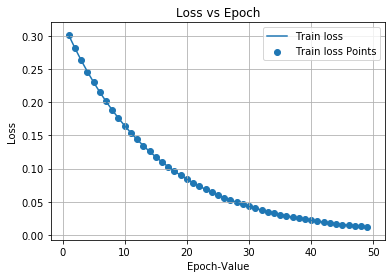

In [46]:
import matplotlib.pyplot as plt

eta0  = 0.001 #lambda
alpha = 0.001 #learning rate
num_iterations = 50

epoch, train_loss,w,b=logistic_regression_fit(f_cv, y_cv, eta0, alpha, num_iterations)


plt.plot(epoch, train_loss, label='Train loss')
#plt.plot(epoch, test_loss, label='Test loss')
plt.scatter(epoch, train_loss, label='Train loss Points')
#plt.scatter(epoch, test_loss, label='Test loss Points')
plt.legend()
plt.xlabel("Epoch-Value")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.grid()
plt.show()


In [47]:
print('Weight')
print(w)
print('Bias')
print(b)


Weight
0.0044628746574650055
Bias
0.004462874815883538


In [48]:
def pred( X, w, b):
      
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(X[i], w, b) >= 0.5:
            predict.append(1)
        else:
            predict.append(0)
          
    return np.array(predict)

In [41]:

f_test,value = decision_function(x_test,y_alpha,sv,intercept,gamma)

In [45]:
y_pred = pred(f_test, w, b)
print(y_pred[:10])

[1 1 1 1 1 1 1 1 1 1]
